<a href="https://colab.research.google.com/github/gavindoughtie/pytorch_class/blob/main/udemy_pytorch_04_nn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another. There can be multiple things as the options.

Book: https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 5000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(5000, 5000)

In [ ]:
print(f'First 5 samples of X:\n{X[:5]}')
print(f'First 5 samples of y:\n{y[:5]}')

First 5 samples of X:
[[-0.75016489 -0.56389205]
 [ 0.78974434  0.12875006]
 [ 0.74764022  0.3065477 ]
 [-0.88825043  0.48969296]
 [-0.16605281  0.95530293]]
First 5 samples of y:
[0 1 1 0 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,-0.750165,-0.563892,0
1,0.789744,0.128750,1
2,0.747640,0.306548,1
3,-0.888250,0.489693,0
4,-0.166053,0.955303,0
5,0.939703,0.259088,0
6,0.071898,0.946672,0
7,0.966870,-0.117308,0
8,1.012444,-0.165832,0
9,-0.670287,-0.754131,0


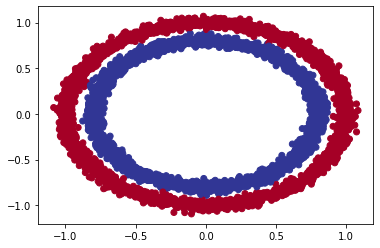

In [ ]:
# Visualize, visualize, visualize!
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment on but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((5000, 2), (5000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample}, y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape}, y: {y_sample.shape}')

Values for one sample of X: [-0.75016489 -0.56389205], y: 0
Shapes for one sample of X: (2,), y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
import torch
torch.__version__

'1.13.0+cu116'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.7502, -0.5639],
         [ 0.7897,  0.1288],
         [ 0.7476,  0.3065],
         [-0.8883,  0.4897],
         [-0.1661,  0.9553]]), tensor([0., 1., 1., 0., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, # 0.2 means 20% will be test, 80% train
    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4000, 1000, 4000, 1000)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass (or forward computation of the model.
4. Instantiate an instance of our model class and send it to the target `device`.

In [ ]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # hidden layer, takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # output layer, takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# 4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=1)
).to(device)
model_0, model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=128, bias=True)
   (1): ReLU()
   (2): Linear(in_features=128, out_features=256, bias=True)
   (3): ReLU()
   (4): Linear(in_features=256, out_features=128, bias=True)
   (5): ReLU()
   (6): Linear(in_features=128, out_features=1, bias=True)
 ), OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                       [ 0.4691, -0.5582],
                       [-0.3260, -0.1997],
                       [-0.4252,  0.0667],
                       [-0.6984,  0.6386],
                       [-0.6007,  0.5459],
                       [ 0.1177, -0.2296],
                       [ 0.4370,  0.1102],
                       [ 0.5713,  0.0773],
                       [-0.2230,  0.1900],
                       [-0.1918,  0.2976],
                       [ 0.6313,  0.4087],
                       [-0.3091,  0.4082],
                       [ 0.1265,  0.3591],
                       [-0.4310, -0.7000],
                       [-0.2732, -0.5424],

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, shape: {X_test.shape}')
print(f'\nFirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nFirst 10 labels:\n{y_test[:10]}')

Length of predictions: 1000, shape: torch.Size([1000, 1])
Length of test samples: 1000, shape: torch.Size([1000, 2])

First 10 predictions:
tensor([[0.0372],
        [0.0224],
        [0.0722],
        [0.0652],
        [0.0545],
        [0.0658],
        [0.0503],
        [0.0695],
        [0.0490],
        [0.0241]], device='cuda:0')

First 10 labels:
tensor([0., 0., 0., 1., 1., 0., 1., 1., 0., 1.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again, this is problem-specific.

For example, for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classifcation you might want binary cross entropy or categorical cross entropy (cross entropy).

([cross entropy by Daniel Godoy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a))

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, checkout the Godoy article.
* For common choices of loss and optimizers, check out the PyTorch docs.

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss - requires inputs to have already gone through (sigmoid) activation
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid built-in, and more numerically stable as it takes advantage of log-sum-exp trick
# https://gregorygundersen.com/blog/2020/02/09/log-sum-exp/
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [ ]:
# Calculate accuracy - True Positive / (True Positive + True Negative) / 100
#   e.g. out of 100 examples, what percentage does the model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train model

To train our model we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0372],
        [0.0224],
        [0.0722],
        [0.0652],
        [0.0545]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([0., 0., 0., 1., 1.])

In [ ]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs                             

tensor([[0.5093],
        [0.5056],
        [0.5180],
        [0.5163],
        [0.5136]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5 `y=0` (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([0., 0., 0., 1., 1.])

### 3.2 Building a training and testing loop

In [ ]:
# Training loop
epochs = 1000
torch.manual_seed(42) # there's also torch.cuda.manual_seed(seed)

# put all tensors on the target device:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Build training and evaulation loop:
for epoch in range(epochs):
  model_0.train() # set to training mode

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print what's happening
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} loss: {loss:.5f}, Acc: {acc:.2f}, Test loss {test_loss:.5f}, test acc: {test_acc:.2f}%')

model_0.state_dict()

Epoch: 0 loss: 0.69291, Acc: 49.40, Test loss 0.69115, test acc: 52.60%
Epoch: 100 loss: 0.67656, Acc: 52.60, Test loss 0.67859, test acc: 49.20%
Epoch: 200 loss: 0.62811, Acc: 90.18, Test loss 0.63085, test acc: 89.30%
Epoch: 300 loss: 0.52988, Acc: 56.40, Test loss 0.52069, test acc: 54.50%
Epoch: 400 loss: 0.35126, Acc: 83.08, Test loss 0.39260, test acc: 74.10%
Epoch: 500 loss: 0.05223, Acc: 99.98, Test loss 0.05414, test acc: 100.00%
Epoch: 600 loss: 0.02228, Acc: 99.98, Test loss 0.02347, test acc: 100.00%
Epoch: 700 loss: 0.01387, Acc: 99.98, Test loss 0.01472, test acc: 100.00%
Epoch: 800 loss: 0.01005, Acc: 99.98, Test loss 0.01074, test acc: 100.00%
Epoch: 900 loss: 0.00788, Acc: 99.98, Test loss 0.00850, test acc: 100.00%


OrderedDict([('0.weight', tensor([[-0.0614, -0.2780],
                      [ 0.5634, -0.6552],
                      [-0.3260, -0.1997],
                      [-0.5634,  0.0504],
                      [-0.8236,  0.7424],
                      [-0.6906,  0.6639],
                      [ 0.1177, -0.2296],
                      [ 0.4212,  0.0825],
                      [ 0.7223,  0.1439],
                      [-0.2230,  0.1900],
                      [-0.2204,  0.3582],
                      [ 0.5496,  0.3643],
                      [-0.3697,  0.4769],
                      [ 0.1824,  0.4081],
                      [-0.4890, -0.8705],
                      [-0.2730, -0.5420],
                      [ 0.5802,  0.2037],
                      [ 0.2580,  0.1845],
                      [ 0.0078,  0.7300],
                      [-0.6473,  0.0443],
                      [-0.6020,  0.2226],
                      [-0.2079,  0.1836],
                      [-0.1335,  0.7553],
                      

## 4. Make predictions and evalulate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual:

In other words, "Visualize, visualize, visualize"

To do so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests

from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


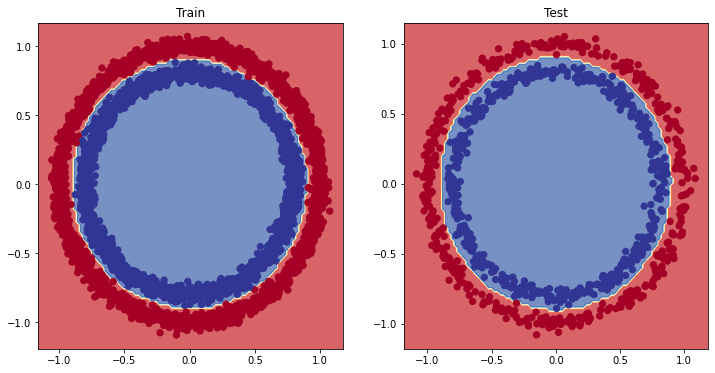

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

Let's try to improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers from 2 -> 3
* increase the number of epochs 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.relu_1 = nn.ReLU() # gavin added
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.relu_2 = nn.ReLU() # gavin added
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.relu_2(self.layer_2(self.relu_1(self.layer_1(x)))))

model_1 = CircleModelV1().to(device)
model_1
                             

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu_1): ReLU()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (relu_2): ReLU()
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss function

loss_fn = torch.nn.BCEWithLogitsLoss()

# Optimizer

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.08)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  ### Training
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels

  # Calculate loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backwards
  loss.backward()

  # optimizer step
  optimizer.step()

  ## testing
  model_1.eval()

  with torch.inference_mode():
    # forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.69312, Acc: 49.40 | Test loss: 0.69229, Test acc: 52.40%
Epoch: 100 | Loss: 0.69109, Acc: 51.98 | Test loss: 0.69203, Test acc: 48.50%
Epoch: 200 | Loss: 0.68978, Acc: 52.12 | Test loss: 0.69112, Test acc: 50.00%
Epoch: 300 | Loss: 0.68816, Acc: 52.85 | Test loss: 0.68979, Test acc: 51.20%
Epoch: 400 | Loss: 0.68603, Acc: 53.83 | Test loss: 0.68800, Test acc: 51.30%
Epoch: 500 | Loss: 0.68290, Acc: 53.67 | Test loss: 0.68523, Test acc: 52.30%
Epoch: 600 | Loss: 0.67874, Acc: 54.02 | Test loss: 0.68163, Test acc: 51.70%
Epoch: 700 | Loss: 0.67321, Acc: 54.55 | Test loss: 0.67661, Test acc: 51.70%
Epoch: 800 | Loss: 0.66528, Acc: 55.47 | Test loss: 0.66914, Test acc: 53.00%
Epoch: 900 | Loss: 0.65485, Acc: 58.70 | Test loss: 0.65933, Test acc: 56.50%
Epoch: 1000 | Loss: 0.63971, Acc: 65.58 | Test loss: 0.64487, Test acc: 62.70%
Epoch: 1100 | Loss: 0.61636, Acc: 72.12 | Test loss: 0.62319, Test acc: 69.50%
Epoch: 1200 | Loss: 0.57111, Acc: 81.25 | Test loss: 0.57991, Te

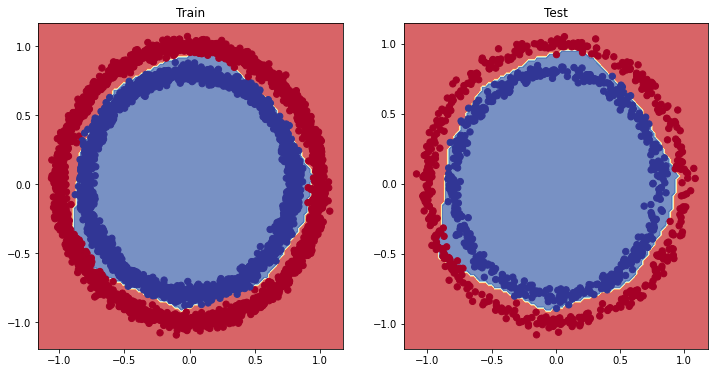

In [ ]:
# Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:] 

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

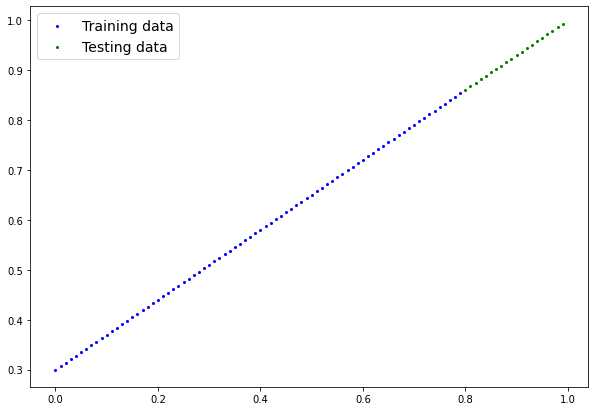

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)
model_2.to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # print out what's happening
  if epoch % 100 == 0:
    print(f'Epoch {epoch} Loss: {loss:.5f} | Test loss: {test_loss:.5f}')
                

Epoch 0 Loss: 0.75986 | Test loss: 0.91103
Epoch 100 Loss: 0.02858 | Test loss: 0.00081
Epoch 200 Loss: 0.02533 | Test loss: 0.00209
Epoch 300 Loss: 0.02137 | Test loss: 0.00305
Epoch 400 Loss: 0.01964 | Test loss: 0.00341
Epoch 500 Loss: 0.01940 | Test loss: 0.00387
Epoch 600 Loss: 0.01903 | Test loss: 0.00379
Epoch 700 Loss: 0.01878 | Test loss: 0.00381
Epoch 800 Loss: 0.01840 | Test loss: 0.00329
Epoch 900 Loss: 0.01798 | Test loss: 0.00360


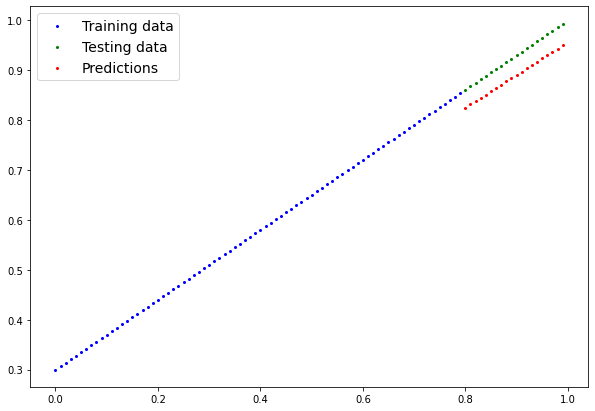

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

  plot_predictions(train_data=X_train_regression.cpu(),
                   train_labels=y_train_regression.cpu(),
                   test_data=X_test_regression.cpu(), 
                   test_labels=y_test_regression.cpu(), 
                   predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given and infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite number (but not really) of linear and non-linear functions.

### 6.1 Recreating non-linear data (red and blue circles)

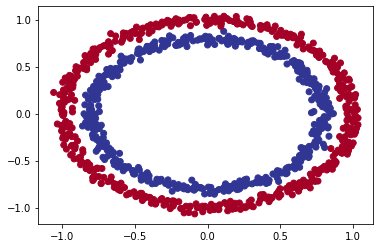

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples=n_samples,noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]), tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straing lines
* Non-linear = non-straight lines

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
  
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)
loss_fn = torch.nn.BCEWithLogitsLoss()

# Training
for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Back prop
  loss.backward()

  # gradient descent
  optimizer.step()

  # print out what's happening
  if epoch % 100 == 0:
    # Testing
    model_3.eval()
    with torch.inference_mode():
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    print(f'Epoch {epoch} Loss: {loss:.5f} | Test loss: {test_loss:.5f}, acc: {acc:.5f}%, test_acc: {acc:.5f}%')

Epoch 0 Loss: 0.69295 | Test loss: 0.69319, acc: 50.00000%, test_acc: 50.00000%
Epoch 100 Loss: 0.69115 | Test loss: 0.69102, acc: 52.87500%, test_acc: 52.87500%
Epoch 200 Loss: 0.68977 | Test loss: 0.68940, acc: 53.37500%, test_acc: 53.37500%
Epoch 300 Loss: 0.68795 | Test loss: 0.68723, acc: 53.00000%, test_acc: 53.00000%
Epoch 400 Loss: 0.68517 | Test loss: 0.68411, acc: 52.75000%, test_acc: 52.75000%
Epoch 500 Loss: 0.68102 | Test loss: 0.67941, acc: 52.75000%, test_acc: 52.75000%
Epoch 600 Loss: 0.67515 | Test loss: 0.67285, acc: 54.50000%, test_acc: 54.50000%
Epoch 700 Loss: 0.66659 | Test loss: 0.66322, acc: 58.37500%, test_acc: 58.37500%
Epoch 800 Loss: 0.65160 | Test loss: 0.64757, acc: 64.00000%, test_acc: 64.00000%
Epoch 900 Loss: 0.62362 | Test loss: 0.62145, acc: 74.00000%, test_acc: 74.00000%


### 6.4 Evaluating a model trained with nonlinear activation functions

y_preds: tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'), y_test: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


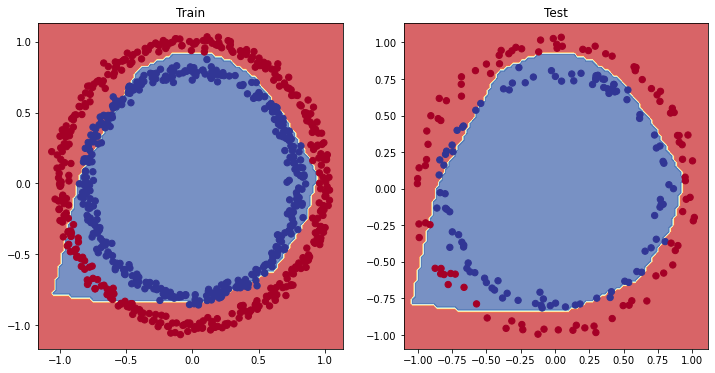

In [ ]:
# Plot decision boundary of the model
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
print(f'y_preds: {y_preds[:10]}, y_test: {y_test[:10]}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions.

In [ ]:
# Create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32)

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

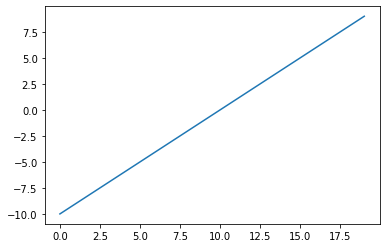

In [ ]:
plt.plot(A)

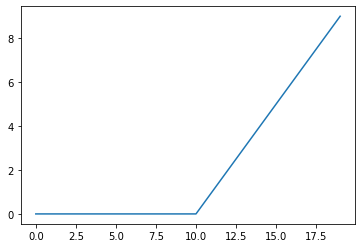

In [ ]:
plt.plot(torch.relu(A))

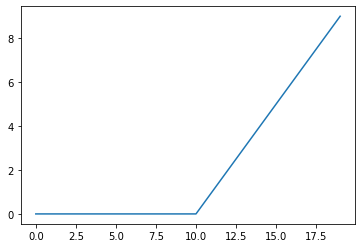

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

plt.plot(relu(A))

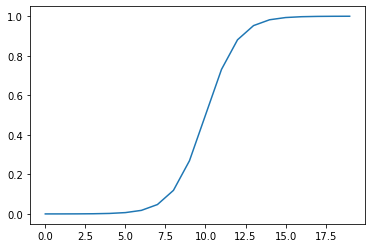

In [ ]:
plt.plot(torch.sigmoid(A))

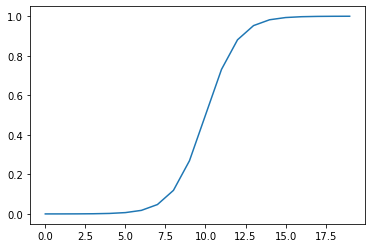

In [ ]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A))

In [ ]:
torch.exp(torch.tensor(5))

tensor(148.4132)

In [ ]:
import math
exponential = math.exp(5)

print(f'e:{math.e} exponential: {exponential}/{math.e ** 5}')

e:2.718281828459045 exponential: 148.4131591025766/148.41315910257657


## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

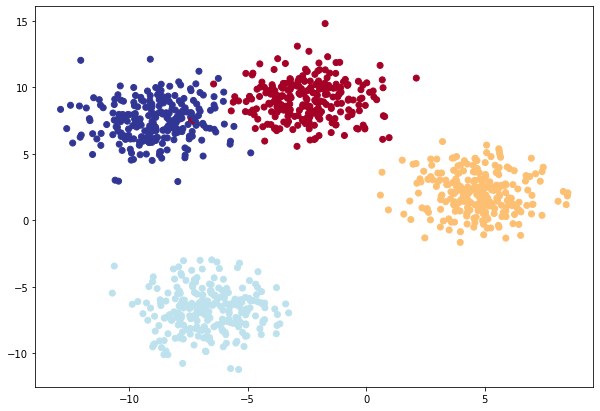

In [ ]:
# import deps
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# Redefine accuracy function so we can just run from here
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give clusters randomness
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# 3. Split into training and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a mult-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes mult-class classification model.

    Args: 
      input_features (int): number of features
      output_features (int): number of outputs (classes)
      hidden_units (int): number of hidden units (per layer), default 8

    Returns:
    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)

# Create an instance and send to target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4, next(model_4.parameters())

(BlobModel(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=8, bias=True)
     (1): ReLU()
     (2): Linear(in_features=8, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=4, bias=True)
   )
 ), Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998]], device='cuda:0', requires_grad=True))

In [ ]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Create an optimizer for multi-class
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In [ ]:
# Put the numpy matrices onto the same device as the model:
X_blob_train, y_blob_train, X_blob_test, y_blob_test = \
  X_blob_train.to(device), \
  y_blob_train.to(device), \
  X_blob_test.to(device), \
  y_blob_test.to(device)

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()

with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw outputs of model) -> Pred probs (use softmax activation) -> pred labels (take the argmax of prediction probabilities)

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
# softmax makes these all sum to 1
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
# Gets the softmax value that is highest (index 0 is also the output in this case)
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
# convert our model's prediction probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

### 8.5 Create a training loop and a testing loop for a multi-class PyTorch model

In [ ]:
X_blob_train.device, next(model_4.parameters()).device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# set the number of epochs
epochs = 2000

# put the data on the target device (done above in 8.4)

# Loop through data
for epoch in range(epochs):
  ### train the model
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  # Print out
  if epoch % 200 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.6438, Acc: 96.88% | Test loss: 0.6812, Test acc: 97.00%
Epoch: 200 | Loss: 0.2374, Acc: 99.25% | Test loss: 0.2445, Test acc: 99.50%
Epoch: 400 | Loss: 0.0648, Acc: 99.25% | Test loss: 0.0591, Test acc: 99.50%
Epoch: 600 | Loss: 0.0429, Acc: 99.25% | Test loss: 0.0354, Test acc: 99.50%
Epoch: 800 | Loss: 0.0353, Acc: 99.25% | Test loss: 0.0269, Test acc: 99.50%
Epoch: 1000 | Loss: 0.0316, Acc: 99.25% | Test loss: 0.0228, Test acc: 99.50%
Epoch: 1200 | Loss: 0.0296, Acc: 99.25% | Test loss: 0.0204, Test acc: 99.50%
Epoch: 1400 | Loss: 0.0284, Acc: 99.25% | Test loss: 0.0188, Test acc: 99.50%
Epoch: 1600 | Loss: 0.0275, Acc: 99.25% | Test loss: 0.0177, Test acc: 99.50%
Epoch: 1800 | Loss: 0.0269, Acc: 99.25% | Test loss: 0.0169, Test acc: 99.50%


In [ ]:
X_blob_train.device, next(model_4.parameters()).device

(device(type='cuda', index=0), device(type='cuda', index=0))

model_4.device before plot: cuda:0
model_4.device after plot: cpu


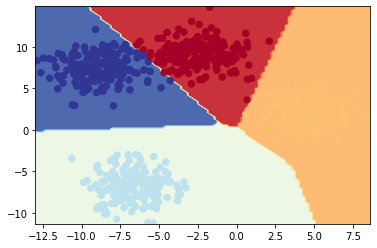

In [ ]:
from pandas.core.algorithms import mode

print(f'model_4.device before plot: {next(model_4.parameters()).device}')
# This plots the ground truth:
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
print(f'model_4.device after plot: {next(model_4.parameters()).device}')
model_4 = model_4.to(device)

model_4.eval()
with torch.inference_mode():
  plot_logits = model_4(X_blob_train)
  preds = torch.softmax(plot_logits, dim=1).argmax(dim=1)
  plot_decision_boundary(model_4, X_blob_train, preds)
model_4 = model_4.to(device)

In [ ]:
X_blob_train.device, next(model_4.parameters()).device

(device(type='cuda', index=0), device(type='cuda', index=0))

### 8.6 Making and evalulating predictions with a PyTorch multi-class model

In [ ]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[ -0.9035,   7.4779,  -8.6692,  -9.6354],
        [ -2.4405,  -7.2783,  -4.5319,   4.0549],
        [ -4.2783,  -4.7152,   4.0184,  -3.2507],
        [ -1.5377,   5.3344,  -4.4905,  -5.5452],
        [  4.8525,  -1.4917, -10.3259,  -7.9919],
        [ -3.1329,  -8.6773,  -5.2322,   4.8255],
        [ -3.7849,  -4.0432,   3.5302,  -2.6834],
        [  4.3435,  -4.7532,  -7.8665,  -4.0619],
        [ -5.4514,  -6.0246,   4.9122,  -4.1858],
        [  4.5304,  -3.5335,  -8.5619,  -5.3875]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.2902e-04, 9.9977e-01, 9.7112e-08, 3.6956e-08],
        [1.5078e-03, 1.1949e-05, 1.8624e-04, 9.9829e-01],
        [2.4906e-04, 1.6092e-04, 9.9889e-01, 6.9603e-04],
        [1.0352e-03, 9.9889e-01, 5.4028e-05, 1.8818e-05],
        [9.9824e-01, 1.7539e-03, 2.5548e-07, 2.6364e-06],
        [3.4958e-04, 1.3667e-06, 4.2841e-05, 9.9961e-01],
        [6.6333e-04, 5.1230e-04, 9.9683e-01, 1.9958e-03],
        [9.9966e-01, 1.1200e-04, 4.9788e-06, 2.2358e-04],
        [3.1555e-05, 1.7788e-05, 9.9984e-01, 1.1187e-04],
        [9.9963e-01, 3.1459e-04, 2.0603e-06, 4.9268e-05]], device='cuda:0')

In [ ]:
# Go from pred_probs to pred_labels
y_preds = torch.argmax(y_pred_probs, dim=1) # or y_pred_probs.argmax()
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

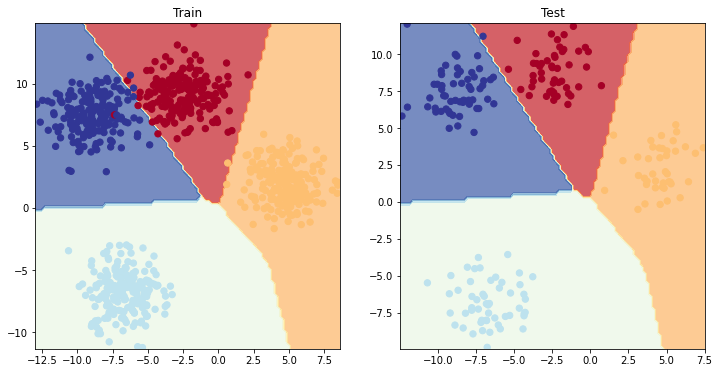

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
# Note that if you comment out the ReLU layers from the model that this will still work as the data is linearly separable

## 9. A few more classification metrics... (to evaluate our classification model)

https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/

* Accuracy - out of 100 samples, how many does our model get right? `torchmetrics.Accuracy()` or `sklearn.metrics.accuracy_score()`. Not the best for imbalanced classes
* Precision - `torchmetrics.Precision()` or `sklearn.metrics.precision_score()`
* Recall - `torchmetrics.Recall()` or `sklearn.metrics.recall_score()`
* F1-score (combines precision and recall) - `torchmetrics.F1()` or `sklearn.metrics.f1_score()`
* Confusion matrix
* Classification report


In [ ]:
# precision, recall and F1 in code:

def recall_fn(true_positives: float, false_negatives: float) -> float:
  return true_positives / (true_positives + false_negatives)

def precision_fn(true_positives: float, false_positives: float) -> float:
  return true_positives / (true_positives + false_positives)

def f1_fn(precision: float, recall: float) -> float:
  return 2 * ((precision * recall)/(precision + recall))

# examples
total_passengers = 800000000
total_terrorists = 19

true_positives = total_terrorists
model_prediction_positives = 19
model_prediction_false_positives = 3
model_prediction_false_negatives = 1

rec = recall_fn(true_positives, model_prediction_false_negatives)
prec = precision_fn(true_positives, model_prediction_false_positives)
f1val = f1_fn(prec, rec)
print(f'recall: {rec}, precision: {prec}, f1:{f1val}')

recall: 0.95, precision: 0.8636363636363636, f1:0.9047619047619048


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 8.3 MB/s 


In [ ]:
from torchmetrics import Accuracy

# setup metric
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

# Exercises and Extra-curriculum

See here: https://www.learnpytorch.io/02_pytorch_classification/#exercises

You can open in collab with this github link: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb